Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from itertools import chain
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Visualization

https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda
https://jovian.ai/dwiknrd/eda-netflix/v/32?utm_source=embed


* Frequent genre, actor, director
* Amount of movies vs Genre
* Year wise analysis, both movies & tv-shows
* Show what country
* 

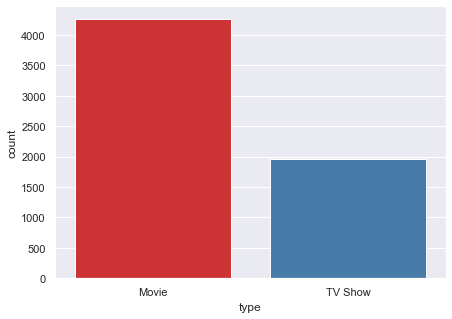

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="type", data=netflix_data, palette="Set1")
plt.show()

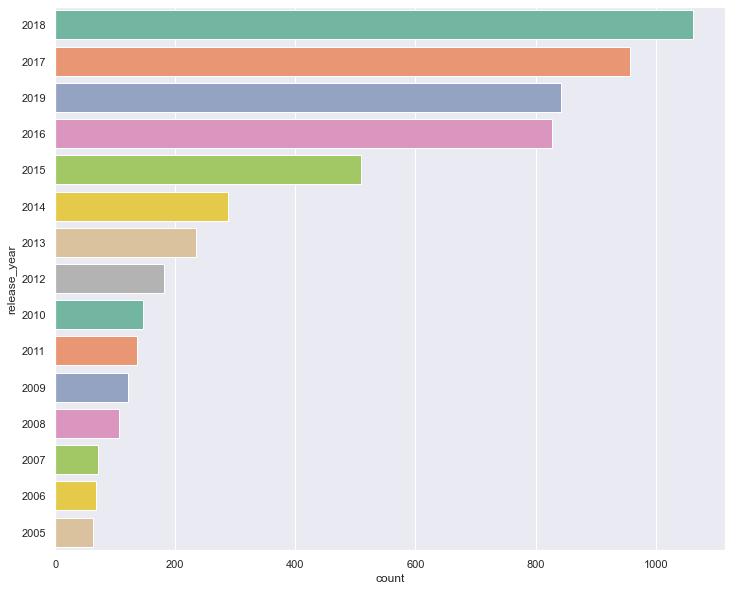

In [9]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_data, 
                   palette="Set2", order=netflix_data.release_year.value_counts().index[0:15])

C:\Users\Steffen\anaconda3\envs\dat540\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


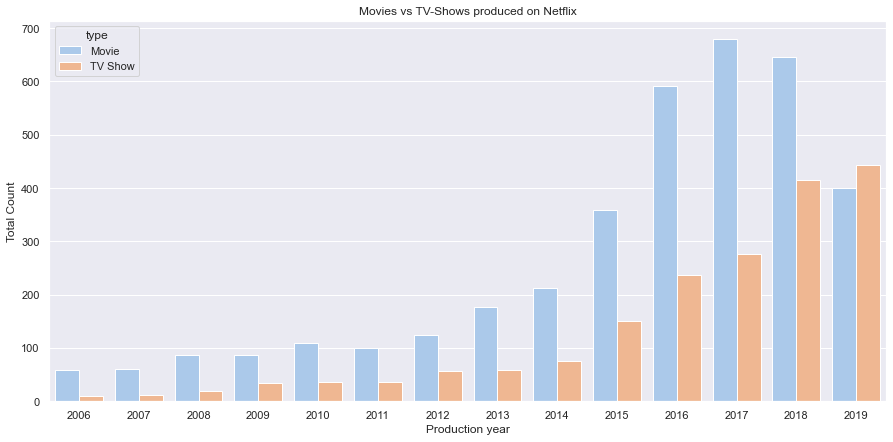

In [11]:
order =  sorted(netflix_data.release_year.unique())[-15:-1]
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_data.release_year, hue=netflix_data.type, order=order, palette="pastel");
plt.title("Movies vs TV-Shows released on Netflix")
plt.xlabel("Production year")
plt.ylabel("Total Count")
plt.show()

Here we can see the rate of Movies & TV Shows released on Netflix. Suddenly in 2019 we can see a clear change in the pattern. There can be several reasons. 
Disney + were launched in 2019, taking away movies that were previously on Netflix. We can also see a jump in TV series in 2018 as previously seen in 2016 for Movies, this can be a reason why Netflix is jumping on the Series train.

## Rating vs Genre

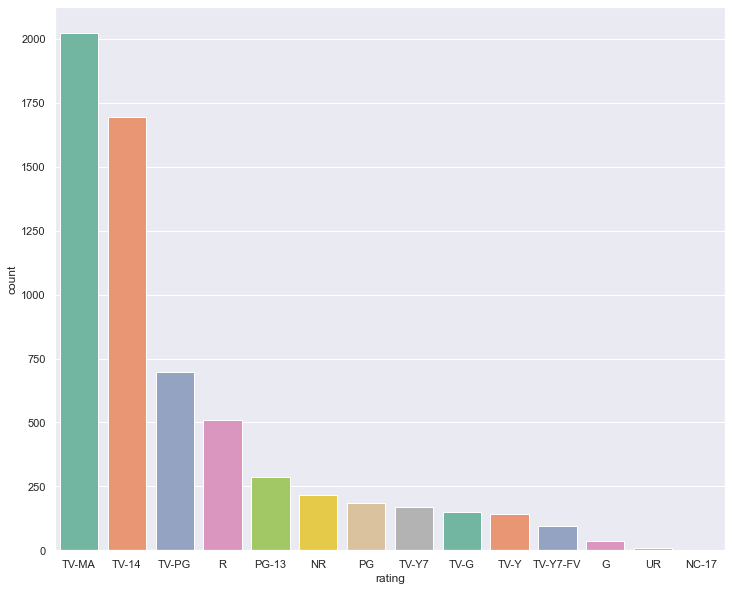

In [12]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

In [13]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = netflix_data['rating'].value_counts()
#tv_rating = tv_show['rating'].value_counts()[rating_order].fillna(0)

In [155]:
replacements = {
        "& Talk": "",
        "Classic & Cult": "Classic, Cult",
        "Features": "",
        "Series": "",
        "Comedy": "Comedies",
        "British": "International",
        "Spanish-Language": "International",
        "Children & Family": "Kids'",
        "TV Shows": "",
        "Movies": "",
        "Docuseries": "Documentaries",
        "& Talk Shows": "",
        "Stand-Up": "",
        "TV": "",
        "Shows": "",
        " ": "",
    }

temp2 = netflix_data.copy()
temp2.listed_in = temp2.listed_in.replace(replacements, regex=True).str.split(',').apply(lambda x: [i for i in x if i != 'International'])

In [156]:
temp3 = temp2.explode('listed_in')
temp3 = temp3.rename(columns={'listed_in': 'Genre', 'rating': 'PG-Rating'})
df = temp3.groupby(['Genre','PG-Rating']).size().unstack(fill_value=0)
df = df[df > 0].fillna(0)

df[1:]

PG-Rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
Genre,,,,,,,,,,,,,,
Action&Adventure,1.0,0.0,28.0,19.0,100.0,124.0,182,1.0,224.0,31,0.0,2.0,8.0,2.0
Anime,0.0,0.0,12.0,1.0,4.0,0.0,71,0.0,36.0,16,1.0,16.0,3.0,0.0
Classic,7.0,0.0,5.0,11.0,9.0,21.0,17,3.0,12.0,21,0.0,0.0,0.0,0.0
Comedies,10.0,1.0,55.0,96.0,103.0,124.0,499,46.0,654.0,189,12.0,57.0,16.0,2.0
Crime,0.0,0.0,4.0,0.0,0.0,0.0,122,1.0,228.0,4,0.0,1.0,2.0,0.0
Cult,0.0,0.0,6.0,1.0,10.0,29.0,8,1.0,10.0,12,0.0,0.0,0.0,0.0
Documentaries,6.0,0.0,42.0,15.0,16.0,17.0,273,61.0,297.0,217,1.0,1.0,0.0,0.0
Dramas,2.0,1.0,96.0,38.0,103.0,252.0,720,11.0,770.0,218,0.0,4.0,0.0,5.0
Faith&Spirituality,0.0,0.0,0.0,10.0,5.0,0.0,19,1.0,0.0,12,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Genre vs PG Rating')

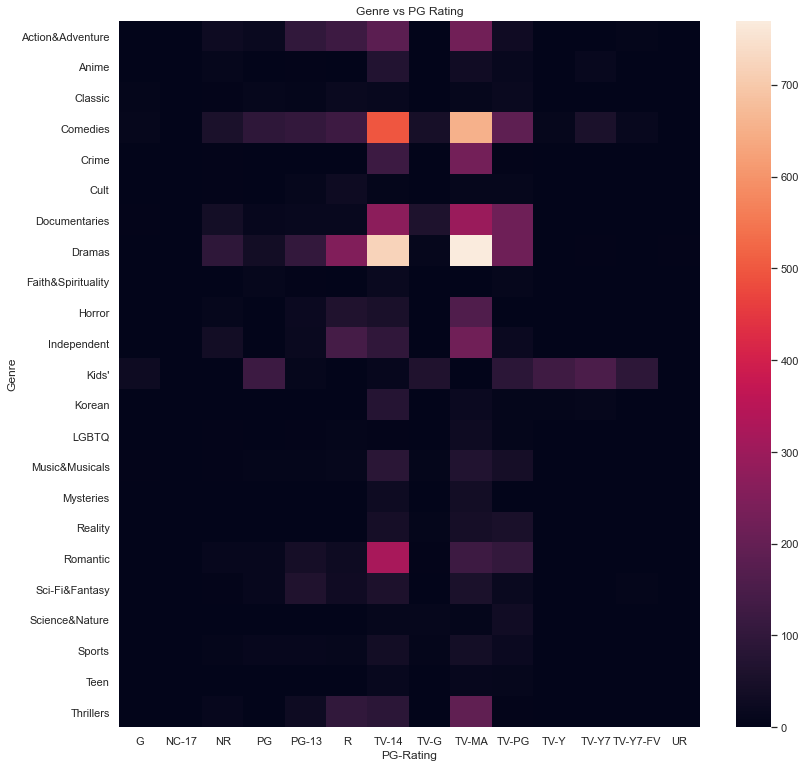

In [157]:
sns.heatmap(df[1:]).set_title("Genre vs PG Rating")

# Neural Network

Ex 4. Try to predict the genre of a movie/show based on the director, actors, etc. using
machine/deep learning techniques.

Here we take a dive into a Neural Network model. It was decided to use the model [MLPClassifier][MLPClassifier] from the sklearn library. We will start this chapter with some displamers. 

Only the finalized model will be displayed here. The data has been polished the python file _cleaning_data_for_NN.py_ to improve the final product. The changes has been mainly to combine similar genres and to remove names of actor/actresses that were only displayed once in the dataset. We believed this would improve our model. 

As stated, the model has been ran several times, however, only the final model has been displayed below.Furthermore, the previous model has been saved and their report is located below in the [result](#Results) section.


## Programming Logic

The core of the programming logic for the final model is simple. In the _cleaning_data_for_NN.py_ file we start by cleaning the provided [netflix data][netflixData] set. Removing nan values and values that were incoherent. Movies/TV Shows labled _just_ Movies/TV Shows were dropped from the dataset, and genres labeled with "TV Show" or "Movie", as for example Romantic Movies ( or Romantic TV Shows) were renamed to just Romantic. The main reason were try to improve the amount of datapoints with the same genre and reducing the amount of classes in the output data. 

Afterwards the data were checked for duplicates. We had issues with some lables because they were mentioned twice in a row. The biggest issue were about "International Movies/TV Shows". Our decision to combine all International subject to a larger genre called "International" made it often appeared more than once in several row it was a subject of. We decided to remove duplicates and the Pandas Dataframe were saved to another CSV file, called _cleaned_Netflix_for_NN.csv_.

[MLPClassifier]: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
[netflixData]: https://www.kaggle.com/shivamb/netflix-shows

### Reading of CSV file, creating and transforming X & y data.

The file _final_NN_script.py_ contains the logic of the final Neural Network algorithm. It will be presented in parts below.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction import text 
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [5]:
netflix_data=pd.read_csv("cleaned_Netflix_for_NN.csv")

smaller_data = netflix_data.copy()

y = smaller_data.listed_in
X = [','.join((d, c, r, t)) for d,c,r,t in zip(
                                                smaller_data.director, 
                                                smaller_data.cast, 
                                                smaller_data.rating, 
                                                smaller_data.title
                                            )]

# Custom stop words for the CountVectorizer to ignore while transforming.
customStopWords=['no cast', 'no director', 'movies', 'tv shows',
                'lgbtq movies', 'teen tv shows', 'cult'] 

# Find all actors that only appears once in the dataset
customCastStopWords = smaller_data.cast.str.split(', ').explode().value_counts()[
    smaller_data.cast.str.split(', ').explode().value_counts() < 2].keys()
customCastStopWords = [x.lower() for x in customCastStopWords] # Make all values lowercase

# Add stopwords for vectorizer into single frozenset
stop_words = text.ENGLISH_STOP_WORDS.union(customStopWords)
stop_words = stop_words.union(list(customCastStopWords))

# Split data into train and test data, training data = 80% of original data & test = 20%.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000) 

# Define the vectorizer algorithm
matrix = CountVectorizer(
    tokenizer=lambda row: [x.strip() for x in row.split(',') if x != ''], 
    stop_words=stop_words)

# Transform X data
x_train_fit = matrix.fit_transform(X_train)
x_test_fit = matrix.transform(X_test)

# Transform y data
y_train_fit = matrix.fit_transform(y_train)
y_test_fit = matrix.transform(y_test)

# Printing out all genres in the y data
print("Genres:")
for i in matrix.get_feature_names():
    print(i)

Genres:
action & adventure
anime
british tv shows
classic
comedies
crime
documentaries
dramas
faith & spirituality
horror
independent movies
international
kids
music & musicals
mysteries
reality tv
romantic
sci-fi & fantasy
science & nature tv
spanish-language tv shows
sports movies
thrillers


#### X & y data

A few lines needs to be explained in the code section above. The fist is the making of the Y and X data (out and in data) used by the Neural Network algorithm. 
```python
y = smaller_data.listed_in
X = [','.join((d, c, r, t)) for d,c,r,t in zip(
                                                smaller_data.director, 
                                                smaller_data.cast, 
                                                smaller_data.rating, 
                                                smaller_data.title
                                            )]
```

y data is the output prediction, and in this model we are trying to predict genres from numerous columns of the data set. Alittle selfexplanatory that the y (out) data points needs to be the genres, which, in the dataset is called _listed_in_

The X data has a simple ( and potentionally improved ) python _join_ method implementation. We make use of the _CountVectorizer_ method deployed by the sklearn library. This will be further explained later, now we just need to know the input of this can be either a string or byte. 

[From the countVectorizer documentation][countVectorizer]: 
> input : string {‘filename’, ‘file’, ‘content’}, default=’content’ <br>
> _Otherwise the input is expected to be a sequence of items that can be of type string or byte._

To get around this issue (easily) since we want several columns the join method were implemented. Here, for each row, we join all directors, cast members, the rating and the tile into single list of string. This is discussed in the [Improvment Chapter](#Improvments-and-further-research)

[countVectorizer]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

#### Stopwords

The next section explained is the stopword logic. Because the netflix data set has empty cells from nearly each column, we made use of the imputation method explained earlier and replaces the empty words with filler words as _No Director_ or _No Cast_. Because these words is selfmade and has no meaning, they needs to not be counted by the CountVectorizer method. Here the stopwords come into play. By writing _No Director_ or _No Cast_ as stopwords (among others), we can rely on the method to not take these words into account when making the fitted data.


```python
# Custom stop words for the CountVectorizer to ignore while transforming.
customStopWords=['no cast', 'no director', 'movies', 'tv shows',
                'lgbtq movies', 'teen tv shows', 'cult'] 

customCastStopWords = smaller_data.cast.str.split(', ').explode().value_counts()[
    smaller_data.cast.str.split(', ').explode().value_counts() < 2].keys()
                                                                                 
customCastStopWords = [x.lower() for x in customCastStopWords] # Make all values lowercase

# Add stopwords for vectorizer into single frozenset
stop_words = text.ENGLISH_STOP_WORDS.union(customStopWords)
stop_words = stop_words.union(list(customCastStopWords))
```

This section of code creates the stopwords for the final model. From previous test the ``` 'lgbtq movies', 'teen tv shows', 'cult' ``` values were added to the stopwords due to the results from the [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from a previous model. 
Further it was decided to remove all actors that only appeared in one movie. The variable _customCastStopWords_ stores these values. 

#### CountVectorizer

After splitting the data into both test and train datasets with a ratio of 20 to 80 percent of the original dataset, the CountVectorizer is used. The documentation explains the class from sklearn as this: 
> Convert a collection of text documents to a matrix of token counts

The method is implemented with a lamdba function: ```  tokenizer=lambda row: [x.strip() for x in row.split(',') if x != ''] ``` The tokenizer paramter is explained as such: 
> tokenizer : callable, default=None <br>
Override the string tokenization step while preserving the preprocessing and n-grams generation steps. 

This is the parameter that is used to split the words from each row. The lamdba function has been implemented to make use of the join method used to join all the different columns. Now each row gets split and stripped for whitespaces to make sure that every item is the same.  

### MLPClassifier method

In [ ]:
hidden_layer = 1000 #round(x_train_fit.shape[1]*(2/3) + y_train_fit.shape[1])

# Small datetime to check when ML started
datetime_object = datetime.datetime.now()
print("Begin ML: ", datetime_object)

# Neural Network algorithm
clf = MLPClassifier(hidden_layer_sizes=(hidden_layer,hidden_layer ),
                    solver='adam', verbose=True, 
                    random_state=1, max_iter=50) 

clf.fit(x_train_fit, y_train_fit)

# Small datetime to check when ML stopped
datetime_object = datetime.datetime.now()
print("End ML: ", datetime_object)

## Results

As this defined as a unbalanced multilabeled classification, we can look at the micro average results to best see the results of the NN model.
By having the _drama_ genre as an example: 

Precision is calculated: <br>
drama correctly indentified divided by drama correctly identified plus other genres identified as drama

Recall is calculated:
Drama correctly identified by drama correctly identified plus drama identified as other genres. 
##### First model

First we present the Classification Report of the First model



In [8]:
from first_NN_model import first_NN_model

x_train_fit, x_test_fit, y_train_fit, y_test_fit, matrix = first_NN_model()

fileName = 'first_unflitered_NN_model.sav'

loaded_model = pickle.load(open(fileName, 'rb'))
y_pred = loaded_model.predict(x_test_fit)


print("Classification Report: \n", classification_report(y_test_fit,y_pred, target_names=list(matrix.get_feature_names())))


Classification Report: 
                               precision    recall  f1-score   support

          action & adventure       0.80      0.14      0.24       115
              anime features       1.00      0.20      0.33         5
                anime series       0.69      0.45      0.55        20
            british tv shows       0.86      0.14      0.24        44
    children & family movies       0.95      0.32      0.48        66
           classic & cult tv       0.00      0.00      0.00         5
              classic movies       1.00      0.06      0.11        18
                    comedies       0.85      0.21      0.34       219
              crime tv shows       0.67      0.03      0.05        78
                 cult movies       1.00      0.06      0.11        17
               documentaries       0.92      0.18      0.30       123
                  docuseries       0.64      0.12      0.20        58
                      dramas       0.73      0.21      0.32     

Before cleaning up the data we can still see a good precision score, however the recall score is lower. 

#### Improving genre data

The first attempt to improve the results were to redefine genres. Previous report says several genres had a precision and recall score of 0, thus we made the decision to combine the genres and/or removed them from the transformed dataset. The resulting report is seen below.

In [10]:
from cleaned_genres_script import cleaned_genres_NN_model

x_train_fit, x_test_fit, y_train_fit, y_test_fit, matrix = cleaned_genres_NN_model()

fileName = 'cleaned_genres_NN_model.sav'

loaded_model = pickle.load(open(fileName, 'rb'))
y_pred = loaded_model.predict(x_test_fit)


print("Classification Report: \n", classification_report(y_test_fit,y_pred, target_names=list(matrix.get_feature_names())))


Classification Report: 
                            precision    recall  f1-score   support

       action & adventure       0.78      0.19      0.30       148
                    anime       0.97      0.82      0.89        34
         british tv shows       0.80      0.30      0.44        40
                  classic       0.50      0.06      0.10        18
                 comedies       0.85      0.39      0.53       357
                    crime       0.71      0.08      0.15        61
            documentaries       0.70      0.48      0.57       191
                   dramas       0.77      0.29      0.42       453
     faith & spirituality       1.00      0.11      0.20         9
                   horror       0.86      0.11      0.20        53
       independent movies       0.78      0.07      0.13        98
            international       0.91      0.72      0.80       581
                     kids       0.98      0.70      0.81       145
         music & musicals       0.62

The result shows a good improvment from 0.19 to 0.38 when we cleaned the genres up. We halved the amount of genres from 42  to 22. Our hypothesis to get more refined genres had a positiv result. However, we can still try to get better results. 

#### Final result

The final model removed all actors that only appeared in one movie, (approx 20k names). The logic is seen in the [first subchapter of Programming Logic](#Reading-of-CSV-file,-creating-and-transforming-X-&-y-data.) chapter. We assumed that these names would only confuse the model and not be helpful. The results are printed below in the already saved model.

In [3]:
# Import values needed for classification report
from final_NN_script import final_NN_model

x_train_fit, x_test_fit, y_train_fit, y_test_fit, matrix = final_NN_model()
# Compute results
fileName = 'Final_NN_model.sav'

loaded_model = pickle.load(open(fileName, 'rb'))
y_pred = loaded_model.predict(x_test_fit)


print("Classification Report: \n", classification_report(y_test_fit,y_pred, target_names=list(matrix.get_feature_names())))


Classification Report: 
                            precision    recall  f1-score   support

       action & adventure       0.74      0.28      0.41       148
                    anime       0.93      0.76      0.84        34
         british tv shows       0.71      0.30      0.42        40
                  classic       0.43      0.17      0.24        18
                 comedies       0.78      0.45      0.57       357
                    crime       0.55      0.10      0.17        61
            documentaries       0.90      0.27      0.42       191
                   dramas       0.71      0.44      0.54       453
     faith & spirituality       1.00      0.11      0.20         9
                   horror       0.89      0.15      0.26        53
       independent movies       0.71      0.10      0.18        98
            international       0.86      0.81      0.83       581
                     kids       0.96      0.74      0.84       145
         music & musicals       0.67

Here we actually see an further improvment on the recall and a small reduction in the precision. Can further small adjustments improve the model? 

### Confusion Matrix Visualization

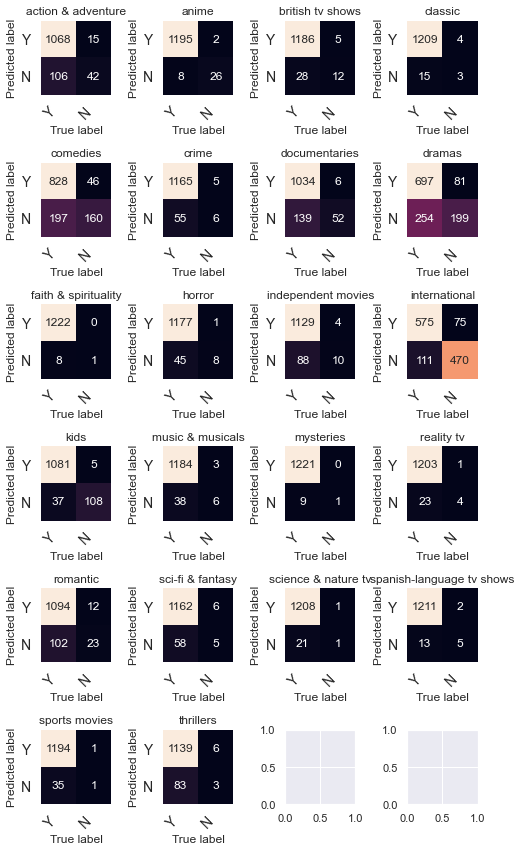

In [206]:
# Confusion Matrix
cm = multilabel_confusion_matrix(y_test_fit, y_pred)

# Make labels out of genres
labels = matrix.get_feature_names()
 
def mutlilabel_cm_plot(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title(class_label)
    
# Plot Confusion Matrix
fig, ax = plt.subplots(6, 4, figsize=(7, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), cm, labels):
    mutlilabel_cm_plot(cfs_matrix, axes, label, ["Y", "N"])

fig.tight_layout()
plt.show()

At the end we show the confusion matrixes of all the genres from the final model. 

### Improvments and further research

Here arqe some features that could have been improved given more knowledge and time

#### Questions
* Could a word embedding model be used to further generalize the names of actor/actresses? 
* Could the title be used in a better extend? Maybe split and remove more of the same word and not use whole title string as an node?
* Could word embedding be used to generelize the training/test data better than the manuall cleaning?

#### Improvments
* The model could be more refined to accept functions and/or make it more resuable.
* The cleaning could be refined to accept different datasets, the genre that were changed is now hardcoded in a dictonary. This is not optimal. 